# Proyecto 1 - Security Data Science

In [2]:
#Librerias que se van a utilizar. 
import pandas as pd
import numpy as np
import  re
import neattext as nt
import unicodedata

import matplotlib.pyplot as plt
from collections import Counter

from sklearn import svm
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

from pandas_profiling import ProfileReport
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import metrics, model_selection, tree
from matplotlib.ticker import StrMethodFormatter
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import statsmodels.api as smm


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

%matplotlib inline

## Analisis Exploratorio


---



In [2]:
#Carga de datos
df1 = pd.read_csv('datasets/dataset-part1.csv')
df2 = pd.read_csv('datasets/dataset-part2.csv')
df3 = pd.read_csv('datasets/dataset-part3.csv')
df4 = pd.read_csv('datasets/dataset-part4.csv')

In [3]:
#Analisis Exploratorio
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3570666 entries, 0 to 3570665
Data columns (total 50 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   BIFLOW_DIRECTION            int64 
 1   DIRECTION                   int64 
 2   DST_TO_SRC_SECOND_BYTES     object
 3   FIREWALL_EVENT              int64 
 4   FIRST_SWITCHED              int64 
 5   FLOW_ACTIVE_TIMEOUT         int64 
 6   FLOW_DURATION_MICROSECONDS  int64 
 7   FLOW_DURATION_MILLISECONDS  int64 
 8   FLOW_END_MILLISECONDS       int64 
 9   FLOW_END_SEC                int64 
 10  FLOW_ID                     int64 
 11  FLOW_INACTIVE_TIMEOUT       int64 
 12  FLOW_START_MILLISECONDS     int64 
 13  FLOW_START_SEC              int64 
 14  FRAME_LENGTH                int64 
 15  IN_BYTES                    int64 
 16  IN_PKTS                     int64 
 17  IPV4_DST_ADDR               object
 18  IPV4_SRC_ADDR               object
 19  L4_DST_PORT                 int64 
 20  L4

In [4]:
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3570666 entries, 0 to 3570665
Data columns (total 50 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   BIFLOW_DIRECTION            int64 
 1   DIRECTION                   int64 
 2   DST_TO_SRC_SECOND_BYTES     object
 3   FIREWALL_EVENT              int64 
 4   FIRST_SWITCHED              int64 
 5   FLOW_ACTIVE_TIMEOUT         int64 
 6   FLOW_DURATION_MICROSECONDS  int64 
 7   FLOW_DURATION_MILLISECONDS  int64 
 8   FLOW_END_MILLISECONDS       int64 
 9   FLOW_END_SEC                int64 
 10  FLOW_ID                     int64 
 11  FLOW_INACTIVE_TIMEOUT       int64 
 12  FLOW_START_MILLISECONDS     int64 
 13  FLOW_START_SEC              int64 
 14  FRAME_LENGTH                int64 
 15  IN_BYTES                    int64 
 16  IN_PKTS                     int64 
 17  IPV4_DST_ADDR               object
 18  IPV4_SRC_ADDR               object
 19  L4_DST_PORT                 int64 
 20  L4

,BIFLOW_DIRECTION,DIRECTION,DST_TO_SRC_SECOND_BYTES,FIREWALL_EVENT,FIRST_SWITCHED,FLOW_ACTIVE_TIMEOUT,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,...,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,SAMPLING_INTERVAL,TOTAL_FLOWS_EXP,LABEL
0,1,0,40,0,1616660040,120,339,0,1616660040010,1616660040,...,1460,0,0,0,0,0,Unknown,1,2293398,Normal flow
1,1,0,",",0,1616660040,120,0,0,1616660040068,1616660040,...,0,0,0,0,40,0,ICMP,1,2293400,Normal flow
2,1,0,104,0,1616660040,120,44725,44,1616660040114,1616660040,...,0,0,0,0,0,0,TLS,1,2293404,Normal flow
3,1,0,",",0,1616660040,120,0,0,1616660040122,1616660040,...,1440,0,8,0,40,0,Unknown,1,2293407,Normal flow
4,1,0,40,0,1616660040,120,1114,1,1616660040184,1616660040,...,0,0,0,0,0,0,TLS,1,2293409,Normal flow


In [5]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8637207 entries, 0 to 8637206
Data columns (total 50 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   BIFLOW_DIRECTION            int64 
 1   DIRECTION                   int64 
 2   DST_TO_SRC_SECOND_BYTES     object
 3   FIREWALL_EVENT              int64 
 4   FIRST_SWITCHED              int64 
 5   FLOW_ACTIVE_TIMEOUT         int64 
 6   FLOW_DURATION_MICROSECONDS  int64 
 7   FLOW_DURATION_MILLISECONDS  int64 
 8   FLOW_END_MILLISECONDS       int64 
 9   FLOW_END_SEC                int64 
 10  FLOW_ID                     int64 
 11  FLOW_INACTIVE_TIMEOUT       int64 
 12  FLOW_START_MILLISECONDS     int64 
 13  FLOW_START_SEC              int64 
 14  FRAME_LENGTH                int64 
 15  IN_BYTES                    int64 
 16  IN_PKTS                     int64 
 17  IPV4_DST_ADDR               object
 18  IPV4_SRC_ADDR               object
 19  L4_DST_PORT                 int64 
 20  L4

,BIFLOW_DIRECTION,DIRECTION,DST_TO_SRC_SECOND_BYTES,FIREWALL_EVENT,FIRST_SWITCHED,FLOW_ACTIVE_TIMEOUT,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,...,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,SAMPLING_INTERVAL,TOTAL_FLOWS_EXP,LABEL
0,1,0,",,48,,,,,,,,,,40,,,,,,,,,,40,,,,,,,,,,40,,,,,,...",0,1618174987,120,104116914,104116,1618175092090,1618175092,...,1460,1460,0,0,0,164,TLS,1,77251491,Normal flow
1,1,0,",,,,,,,,,,,",0,1618175067,120,9529030,9529,1618175077010,1618175077,...,0,0,0,0,0,0,STUN.Messenger,1,77251492,Normal flow
2,1,0,",,,,,,,,,,,",0,1618175067,120,9529169,9529,1618175077010,1618175077,...,0,0,0,0,192,0,ICMP,1,77251493,Normal flow
3,1,0,",",0,1618175077,120,0,0,1618175077021,1618175077,...,0,0,0,0,72,0,ICMP,1,77251494,Normal flow
4,1,0,",",0,1618175077,120,0,0,1618175077069,1618175077,...,0,0,0,0,0,0,Unknown,1,77251495,Normal flow


In [6]:
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330692 entries, 0 to 1330691
Data columns (total 50 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   BIFLOW_DIRECTION            1330692 non-null  int64 
 1   DIRECTION                   1330692 non-null  int64 
 2   DST_TO_SRC_SECOND_BYTES     1330692 non-null  object
 3   FIREWALL_EVENT              1330692 non-null  int64 
 4   FIRST_SWITCHED              1330692 non-null  int64 
 5   FLOW_ACTIVE_TIMEOUT         1330692 non-null  int64 
 6   FLOW_DURATION_MICROSECONDS  1330692 non-null  int64 
 7   FLOW_DURATION_MILLISECONDS  1330692 non-null  int64 
 8   FLOW_END_MILLISECONDS       1330692 non-null  int64 
 9   FLOW_END_SEC                1330692 non-null  int64 
 10  FLOW_ID                     1330692 non-null  int64 
 11  FLOW_INACTIVE_TIMEOUT       1330692 non-null  int64 
 12  FLOW_START_MILLISECONDS     1330692 non-null  int64 
 13  FLOW_START_S

,BIFLOW_DIRECTION,DIRECTION,DST_TO_SRC_SECOND_BYTES,FIREWALL_EVENT,FIRST_SWITCHED,FLOW_ACTIVE_TIMEOUT,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,...,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,SAMPLING_INTERVAL,TOTAL_FLOWS_EXP,LABEL
0,1,0,138,0,1622174400,120,682,0,1622174400001,1622174400,...,0,0,0,0,0,0,DNS,1,1365973,Normal flow
1,1,0,75,0,1622174400,120,579,0,1622174400001,1622174400,...,0,0,0,0,0,0,DNS,1,1365974,Normal flow
2,1,0,40,0,1622174400,120,213,0,1622174400053,1622174400,...,0,0,0,0,40,40,Unknown,1,1365976,Normal flow
3,1,0,166,0,1622174400,120,257,0,1622174400109,1622174400,...,0,0,0,0,0,0,DNS,1,1365978,Normal flow
4,1,0,",",0,1622174400,120,0,0,1622174400114,1622174400,...,0,0,0,0,196,0,ICMP,1,1365979,Normal flow


In [7]:
df4.info()
df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26725246 entries, 0 to 26725245
Data columns (total 50 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   BIFLOW_DIRECTION            int64 
 1   DIRECTION                   int64 
 2   DST_TO_SRC_SECOND_BYTES     object
 3   FIREWALL_EVENT              int64 
 4   FIRST_SWITCHED              int64 
 5   FLOW_ACTIVE_TIMEOUT         int64 
 6   FLOW_DURATION_MICROSECONDS  int64 
 7   FLOW_DURATION_MILLISECONDS  int64 
 8   FLOW_END_MILLISECONDS       int64 
 9   FLOW_END_SEC                int64 
 10  FLOW_ID                     int64 
 11  FLOW_INACTIVE_TIMEOUT       int64 
 12  FLOW_START_MILLISECONDS     int64 
 13  FLOW_START_SEC              int64 
 14  FRAME_LENGTH                int64 
 15  IN_BYTES                    int64 
 16  IN_PKTS                     int64 
 17  IPV4_DST_ADDR               object
 18  IPV4_SRC_ADDR               object
 19  L4_DST_PORT                 int64 
 20  

,BIFLOW_DIRECTION,DIRECTION,DST_TO_SRC_SECOND_BYTES,FIREWALL_EVENT,FIRST_SWITCHED,FLOW_ACTIVE_TIMEOUT,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,...,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,SAMPLING_INTERVAL,TOTAL_FLOWS_EXP,LABEL
0,1,0,138,0,1622433600,120,857,0,1622433600002,1622433600,...,0,0,0,0,0,0,DNS,1,7062121,Normal flow
1,1,0,75,0,1622433600,120,924,0,1622433600002,1622433600,...,0,0,0,0,0,0,DNS,1,7062122,Normal flow
2,1,0,",",0,1622433600,120,0,0,1622433600007,1622433600,...,0,0,0,0,40,0,Unknown,1,7062123,Normal flow
3,1,0,166,0,1622433600,120,513,0,1622433600090,1622433600,...,0,0,0,0,0,0,DNS,1,7062127,Normal flow
4,1,0,52,0,1622433600,120,26595,26,1622433600097,1622433600,...,0,0,0,0,0,0,TLS.Google,1,7062128,Normal flow


## Pre – procesamiento

---

In [3]:
# Juntar Dataframes
df = pd.concat([df1, df2, df3, df4])

In [9]:
#del df1, df2, df3, df4

In [4]:
# Validar el tamaño del df
df.shape

(40263811, 50)

In [5]:
# Sample df
#del df1, df2, df3, df4

In [9]:
# ! TODO: Crear un sample mas grande 30% maybe
df_sample_1.shape

(197718, 35)

In [10]:
# Muestra cuantos Labels distintos hay en el dataset

df_sample_1['LABEL'].unique()

array([1, 3, 2, 4], dtype=int64)

In [11]:
# Contar proporcion segun Label

df_sample_1['LABEL'].value_counts()

1    169681
2     12507
3     11124
4      4406
Name: LABEL, dtype: int64

In [16]:
# Eliminar Labels no necesarios (Ruido)

df_sample_1.drop(df_sample_1[df_sample_1['LABEL'] == 'UDP Scan'].index, inplace = True)
df_sample_1.drop(df_sample_1[df_sample_1['LABEL'] == 'NULL Scan'].index, inplace = True)
df_sample_1.drop(df_sample_1[df_sample_1['LABEL'] == 'XMAS Scan'].index, inplace = True)
df_sample_1.drop(df_sample_1[df_sample_1['LABEL'] == 'FIN Scan'].index, inplace = True)

df_sample_1['LABEL'].value_counts()

In [17]:
# Es como guardar el sample

df_sample_1.to_csv('datasets/sample.csv', index=False)

## Selección de características

---

In [18]:
#Selección de características

In [19]:
# Eliminar columnas que no aportan

df_sample_1.drop(columns=['BIFLOW_DIRECTION', 'DIRECTION', 'DST_TO_SRC_SECOND_BYTES', 'FIREWALL_EVENT', 'FLOW_ACTIVE_TIMEOUT', 'FLOW_ID', 'FLOW_INACTIVE_TIMEOUT', 'FRAME_LENGTH', 'IPV4_DST_ADDR', 'IPV4_SRC_ADDR', 'MAX_IP_PKT_LEN', 'MIN_IP_PKT_LEN', 'OOORDER_IN_PKTS', 'OOORDER_OUT_PKTS', 'SAMPLING_INTERVAL'], axis=1)

df_sample_1

In [20]:
df_sample_1.groupby('L7_PROTO_NAME').filter(lambda x : len(x)>1000)

,FIRST_SWITCHED,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,FLOW_START_MILLISECONDS,FLOW_START_SEC,IN_BYTES,IN_PKTS,L4_DST_PORT,...,TCP_WIN_MIN_OUT,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,TOTAL_FLOWS_EXP,LABEL
0,1622440415,293,0,1622440415550,1622440415,1622440415550,1622440415,40,1,64887,...,0,0,0,0,0,0,0,Unknown,18243429,1
1,1618253929,132,0,1618253929811,1618253929,1618253929811,1618253929,91,1,53,...,0,0,0,0,0,0,0,DNS,85522963,1
2,1618231864,110678246,110678,1618231975092,1618231975,1618231864413,1618231864,1106,13,80,...,114,0,0,0,0,0,0,HTTP,82676051,3
3,1622442794,310,0,1622442794394,1622442794,1622442794393,1622442794,40,1,53920,...,0,0,0,0,0,0,0,Unknown,24513834,1
4,1618231788,127196,127,1618231788547,1618231788,1618231788419,1618231788,131,1,2837,...,0,0,0,0,0,0,164,BitTorrent,82611320,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197713,1622441333,251,0,1622441333368,1622441333,1622441333368,1622441333,40,1,42800,...,0,0,0,0,0,0,0,Unknown,23578311,1
197714,1618230202,110264527,110264,1618230313157,1618230313,1618230202893,1618230202,1180,14,80,...,114,0,0,0,0,0,0,HTTP,82071056,3
197715,1622440363,285,0,1622440363294,1622440363,1622440363293,1622440363,40,1,9603,...,0,0,0,0,0,0,0,Unknown,17940771,1
197716,1622438559,260,0,1622438559253,1622438559,1622438559253,1622438559,40,1,35915,...,0,0,0,0,0,0,0,Unknown,15298645,1


In [21]:
# Guardamos el group by
df_sample_1.to_csv('datasets/sample_groupby.csv', index=False)

In [22]:
df_sample_1['L7_PROTO_NAME'].value_counts()

Unknown            145971
HTTP                16147
DNS                  8163
TLS                  5041
DNS.Google           3289
                    ...  
STUN.Zoom               1
RX                      1
SSH.Microsoft           1
TLS.PlayStore           1
CiscoVPN.Amazon         1
Name: L7_PROTO_NAME, Length: 269, dtype: int64

In [23]:
# Codificar columnas

for index, row in df_sample_1.iterrows():
    if row['LABEL'] == 'Normal flow':
        df_sample_1.loc[index,'LABEL']= 1
    elif row['LABEL'] == 'SYN Scan - aggressive':
        df_sample_1.loc[index,'LABEL'] = 2
    elif row['LABEL'] == 'Denial of Service R-U-Dead-Yet':
        df_sample_1.loc[index,'LABEL'] = 3
    elif row['LABEL'] == 'Denial of Service Slowloris':
        df_sample_1.loc[index,'LABEL'] = 4

    
df_sample_1.head(5)

,FIRST_SWITCHED,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,FLOW_START_MILLISECONDS,FLOW_START_SEC,IN_BYTES,IN_PKTS,L4_DST_PORT,...,TCP_WIN_MIN_OUT,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,TOTAL_FLOWS_EXP,LABEL
0,1622440415,293,0,1622440415550,1622440415,1622440415550,1622440415,40,1,64887,...,0,0,0,0,0,0,0,Unknown,18243429,1
1,1618253929,132,0,1618253929811,1618253929,1618253929811,1618253929,91,1,53,...,0,0,0,0,0,0,0,DNS,85522963,1
2,1618231864,110678246,110678,1618231975092,1618231975,1618231864413,1618231864,1106,13,80,...,114,0,0,0,0,0,0,HTTP,82676051,3
3,1622442794,310,0,1622442794394,1622442794,1622442794393,1622442794,40,1,53920,...,0,0,0,0,0,0,0,Unknown,24513834,1
4,1618231788,127196,127,1618231788547,1618231788,1618231788419,1618231788,131,1,2837,...,0,0,0,0,0,0,164,BitTorrent,82611320,1


In [24]:
df_sample_1 = pd.read_csv('sample_lable.csv')

In [25]:
uniqueValues = df_sample_1['L7_PROTO_NAME'].unique()
uniqueValues = uniqueValues.tolist()
uniqueValues

['Unknown',
 'DNS',
 'HTTP',
 'BitTorrent',
 'DNS.Cloudflare',
 'DNS.Google',
 'TLS.Skype',
 'ICMP',
 'TLS.Google',
 'SSH',
 'TLS',
 'Telnet',
 'DNS.Microsoft',
 'QUIC.Google',
 'ICMP.Amazon',
 'STUN.Messenger',
 'TLS.Dropbox',
 'DNS.Dropbox',
 'QUIC.YouTube',
 'HTTP_Proxy',
 'TLS.Microsoft365',
 'HTTP.Microsoft',
 'DNS.Yahoo',
 'TLS.Amazon',
 'DNS.Amazon',
 'DNS.Skype',
 'DNS.Facebook',
 'IMAP',
 'TLS.Twitter',
 'QUIC.Cloudflare',
 'DNS.Telegram',
 'STUN.SkypeCall',
 'DNS.MS_OneDrive',
 'NFS',
 'TLS.Cloudflare',
 'DNS.eBay',
 'DNS.ApplePush',
 'DNS.Apple',
 'ICMP.Google',
 'MQTT',
 'Google',
 'DNS.GoogleServices',
 'NTP',
 'STUN.GoogleHangoutDuo',
 'DNS.UbuntuONE',
 'DNS.OpenDNS',
 'SNMP',
 'TLS.Spotify',
 'TLS.Microsoft',
 'Apple',
 'TLS.Facebook',
 'TLS.Yahoo',
 'DNS.YouTube',
 'HTTP.Google',
 'TLS.UbuntuONE',
 'TeamViewer',
 'QUIC.GoogleDrive',
 'DNS.AnyDesk',
 'MsSQL-TDS',
 'DNS.Teams',
 'NTP.Cloudflare',
 'TLS.Telegram',
 'RemoteScan',
 'TLS.TikTok',
 'MongoDB',
 'TLS.YouTube',
 

In [26]:
for index, row in df_sample_1.iterrows():
    if row['L7_PROTO_NAME'] in uniqueValues:
        df_sample_1.loc[index,'L7_PROTO_NAME']= uniqueValues.index(row['L7_PROTO_NAME'])
df_sample_1

,FIRST_SWITCHED,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,FLOW_START_MILLISECONDS,FLOW_START_SEC,IN_BYTES,IN_PKTS,L4_DST_PORT,...,TCP_WIN_MIN_OUT,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,TOTAL_FLOWS_EXP,LABEL
0,1622440415,293,0,1622440415550,1622440415,1622440415550,1622440415,40,1,64887,...,0,0,0,0,0,0,0,0,18243429,1
1,1618253929,132,0,1618253929811,1618253929,1618253929811,1618253929,91,1,53,...,0,0,0,0,0,0,0,1,85522963,1
2,1618231864,110678246,110678,1618231975092,1618231975,1618231864413,1618231864,1106,13,80,...,114,0,0,0,0,0,0,2,82676051,3
3,1622442794,310,0,1622442794394,1622442794,1622442794393,1622442794,40,1,53920,...,0,0,0,0,0,0,0,0,24513834,1
4,1618231788,127196,127,1618231788547,1618231788,1618231788419,1618231788,131,1,2837,...,0,0,0,0,0,0,164,3,82611320,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197713,1622441333,251,0,1622441333368,1622441333,1622441333368,1622441333,40,1,42800,...,0,0,0,0,0,0,0,0,23578311,1
197714,1618230202,110264527,110264,1618230313157,1618230313,1618230202893,1618230202,1180,14,80,...,114,0,0,0,0,0,0,2,82071056,3
197715,1622440363,285,0,1622440363294,1622440363,1622440363293,1622440363,40,1,9603,...,0,0,0,0,0,0,0,0,17940771,1
197716,1622438559,260,0,1622438559253,1622438559,1622438559253,1622438559,40,1,35915,...,0,0,0,0,0,0,0,0,15298645,1


## Separación de datos

#### 55% entrenamiento, 15% validación y 30% pruebas

In [27]:
#Separación de datos
#Balanceo de dataset

"""
    Normal flow --> 1
    SYN Scan - aggressive --> 2
    Denial of Service R-U-Dead-Yet --> 3
    Denial of Service Slowloris --> 4
"""
#Datos totales (longitud)
print( "Existen un total de " , len(df_sample_1) , "datos ")

#Desglose de datos segun su "tipo"
df_sample_1['LABEL'].value_counts()


Existen un total de  197718 datos 


1    169681
2     12507
3     11124
4      4406
Name: LABEL, dtype: int64

In [28]:
df_sample_1['PROTOCOL_MAP']

0         tcp
1         udp
2         tcp
3         tcp
4         udp
         ... 
197713    tcp
197714    tcp
197715    tcp
197716    tcp
197717    tcp
Name: PROTOCOL_MAP, Length: 197718, dtype: object

In [29]:
uniqueValues = df_sample_1['PROTOCOL_MAP'].unique()
uniqueValues = uniqueValues.tolist()
uniqueValues

['tcp', 'udp', 'icmp', 'gre']

In [30]:
# Codificar columnas
for index, row in df_sample_1.iterrows():
    if row['PROTOCOL_MAP'] == 'tcp':
        df_sample_1.loc[index,'PROTOCOL_MAP']= 1
    elif row['PROTOCOL_MAP'] == 'udp':
        df_sample_1.loc[index,'PROTOCOL_MAP'] = 2
    elif row['PROTOCOL_MAP'] == 'icmp':
        df_sample_1.loc[index,'PROTOCOL_MAP'] = 3
    elif row['PROTOCOL_MAP'] == 'gre':
        df_sample_1.loc[index,'PROTOCOL_MAP'] = 4
    elif row['PROTOCOL_MAP'] == 'Unknown':
        df_sample_1.loc[index,'PROTOCOL_MAP'] = 5

In [31]:
df_sample_1.to_csv('sample_separated.csv', index=False)

In [32]:
df_sample_1 = df_sample_1.drop(columns=['SRC_TO_DST_SECOND_BYTES'], axis=1)

In [33]:
df_sample_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197718 entries, 0 to 197717
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   FIRST_SWITCHED              197718 non-null  int64 
 1   FLOW_DURATION_MICROSECONDS  197718 non-null  int64 
 2   FLOW_DURATION_MILLISECONDS  197718 non-null  int64 
 3   FLOW_END_MILLISECONDS       197718 non-null  int64 
 4   FLOW_END_SEC                197718 non-null  int64 
 5   FLOW_START_MILLISECONDS     197718 non-null  int64 
 6   FLOW_START_SEC              197718 non-null  int64 
 7   IN_BYTES                    197718 non-null  int64 
 8   IN_PKTS                     197718 non-null  int64 
 9   L4_DST_PORT                 197718 non-null  int64 
 10  L4_SRC_PORT                 197718 non-null  int64 
 11  LAST_SWITCHED               197718 non-null  int64 
 12  OUT_BYTES                   197718 non-null  int64 
 13  OUT_PKTS                    1

In [35]:

#El balanceo de datos se baso en varias practicas vistas en clase
#y al mismo tiempo esta seccion esta basado en los siguientes 
#ejercicios 

#https://imbalanced-learn.org/stable/under_sampling.html
#https://towardsdatascience.com/how-to-balance-a-dataset-in-python-36dff9d12704

In [36]:
sm = SMOTE(sampling_strategy = {1: 500000, 2:500000,3:500000,4:500000})
x = df_sample_1.loc[:, df_sample_1.columns != 'LABEL']
y = df_sample_1["LABEL"]
x, y = sm.fit_resample(x, y)
print("Oversample counter --> ",Counter(y))

C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:318: UserWarning: After over-sampling, the number of samples (500000) in class 1 will be larger than the number of samples in the majority class (class #1 -> 169681)
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:318: UserWarning: After over-sampling, the number of samples (500000) in class 2 will be larger than the number of samples in the majority class (class #1 -> 169681)
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:318: UserWarning: After over-sampling, the number of samples (500000) in class 3 will be larger than the number of samples in the majority class (class #1 -> 169681)
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:318: UserWarning: After over-sampling, the number of samples (500000) in class 4 will be larger than the number of samples in the majority class (class #1 -> 1

Oversample counter -->  Counter({1: 500000, 3: 500000, 2: 500000, 4: 500000})


In [37]:
#df1 = pd.read_csv('sample_lable.csv'
#df1.dropna()
# X = df1.drop(['LABEL'], axis=1)
# y = df1['LABEL']
#del df1
#X.shape
#df1.drop(columns=['SRC_TO_DST_SECOND_BYTES'], axis=1)
#df1 = df1.replace("Unknown",np.nan).bfill().ffill()
#X_new = SelectKBest(chi2, k=10).fit_transform(X, y)
#feature_train, feature_test, target_train, target_test =\ train_test_split(X, y, test_size=0.30, random_state=31)

In [38]:
sample_oversampling_1 = x

In [39]:
sample_oversampling_1["LABEL"] = y

In [40]:
print(" Oversampling counter -->",Counter(sample_oversampling_1["LABEL"]))

 Oversampling counter --> Counter({1: 500000, 3: 500000, 2: 500000, 4: 500000})


In [41]:
rus = RandomUnderSampler(random_state=42, sampling_strategy={2:500000, 4:500000})
x = sample_oversampling_1.loc[:,sample_oversampling_1.columns != 'LABEL']
y = sample_oversampling_1["LABEL"]
x, y = rus.fit_resample(x, y)
print("Undersampling counter -->: ",Counter(y))


# --------------------------
#Luego de usar aplicar over y under sampling
#tenemos que mostrar nuestro sample ya balanceado


df_sample_1_balanced = x
df_sample_1_balanced["LABEL"] = y
print("Undersampling counter ",Counter(df_sample_1_balanced["LABEL"]))

Undersampling counter -->:  Counter({1: 500000, 2: 500000, 3: 500000, 4: 500000})
Undersampling counter  Counter({1: 500000, 2: 500000, 3: 500000, 4: 500000})


In [42]:
x.head(5)

,FIRST_SWITCHED,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,FLOW_START_MILLISECONDS,FLOW_START_SEC,IN_BYTES,IN_PKTS,L4_DST_PORT,...,TCP_WIN_MIN_OUT,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,TOTAL_FLOWS_EXP,LABEL
0,1622440415,293,0,1622440415550,1622440415,1622440415550,1622440415,40,1,64887,...,0,0,0,0,0,0,0,0.0,18243429,1
1,1618253929,132,0,1618253929811,1618253929,1618253929811,1618253929,91,1,53,...,0,0,0,0,0,0,0,1.0,85522963,1
2,1622442794,310,0,1622442794394,1622442794,1622442794393,1622442794,40,1,53920,...,0,0,0,0,0,0,0,0.0,24513834,1
3,1618231788,127196,127,1618231788547,1618231788,1618231788419,1618231788,131,1,2837,...,0,0,0,0,0,0,164,3.0,82611320,1
4,1622444041,291,0,1622444041901,1622444041,1622444041901,1622444041,40,1,56122,...,0,0,0,0,0,0,0,0.0,31472059,1


In [43]:
df_sample_1['LABEL'].value_counts()

1    169681
2     12507
3     11124
4      4406
Name: LABEL, dtype: int64

In [44]:
df_sample_1_balanced.to_csv('df_sample_1_balanced.csv', index=False)

## Implementación

---

In [45]:
#Implementación AQUIIIIIIIIIIII 
df_sample_1 = pd.read_csv('sample_separated.csv')

In [46]:
sorted(Counter(df_sample_1['LABEL']).items())

[(1, 169681), (2, 12507), (3, 11124), (4, 4406)]

In [47]:
#df_sample_1.describe()

1    169681
2     12507
3     11124
4      4406
Name: LABEL, dtype: int64

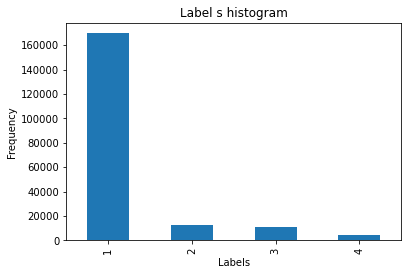

In [48]:
pd.value_counts(df_sample_1['LABEL']).plot.bar()
plt.title('Label s histogram')
plt.xlabel('Labels')
plt.ylabel('Frequency')
df_sample_1['LABEL'].value_counts()

In [3]:
#AQUIIIIIIIIIIII 
df_sample_1 = pd.read_csv('df_sample_1_balanced.csv')

In [50]:
sorted(Counter(df_sample_1['LABEL']).items())

[(1, 500000), (2, 500000), (3, 500000), (4, 500000)]

1    500000
2    500000
3    500000
4    500000
Name: LABEL, dtype: int64

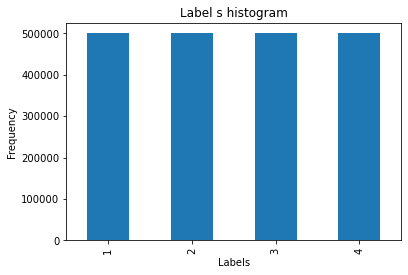

In [51]:
pd.value_counts(df_sample_1['LABEL']).plot.bar()
plt.title('Label s histogram')
plt.xlabel('Labels')
plt.ylabel('Frequency')
df_sample_1['LABEL'].value_counts()

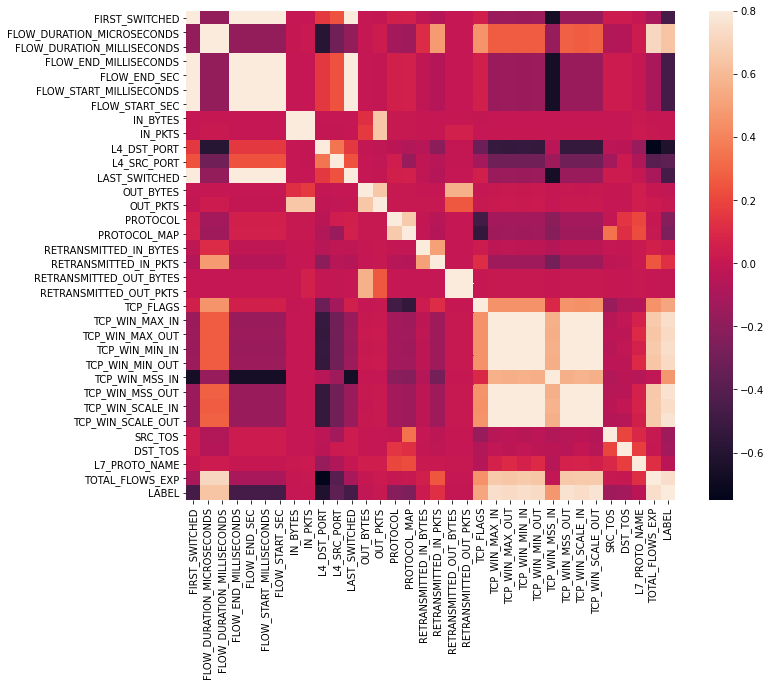

In [52]:
# Matriz de correlación:

corrmat = df_sample_1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


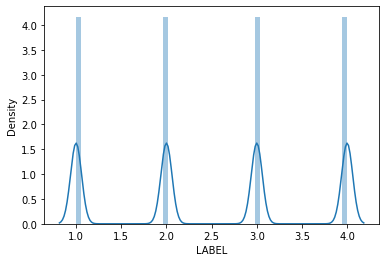

In [53]:
import seaborn as sns
sns.distplot(df_sample_1['LABEL']);

In [54]:
# Asimetría y curtosis:

print("Skewness: %f" % df_sample_1['LABEL'].skew())
print("Kurtosis: %f" % df_sample_1['LABEL'].kurt())

Skewness: 0.000000
Kurtosis: -1.360000


In [55]:
# ---

In [56]:
# Asimetría y curtosis:

print("Skewness: %f" % df_sample_1['L7_PROTO_NAME'].skew())
print("Kurtosis: %f" % df_sample_1['L7_PROTO_NAME'].kurt())

Skewness: 15.758291
Kurtosis: 338.912587


In [57]:
corr = df_sample_1.corr()
corr[['LABEL']].sort_values(by = 'LABEL',ascending = False).style.background_gradient()

,LABEL
LABEL,1.000000
TCP_WIN_SCALE_OUT,0.767724
TCP_WIN_MSS_OUT,0.760439
TCP_WIN_MIN_IN,0.750283
TCP_WIN_MAX_IN,0.749657
TOTAL_FLOWS_EXP,0.745595
TCP_WIN_SCALE_IN,0.742373
TCP_WIN_MAX_OUT,0.729839
TCP_WIN_MIN_OUT,0.729715
FLOW_DURATION_MICROSECONDS,0.638926


In [58]:
corr = df_sample_1.corr()
corr[['PROTOCOL_MAP']].sort_values(by = 'PROTOCOL_MAP',ascending = False).style.background_gradient()

,PROTOCOL_MAP
PROTOCOL_MAP,1.000000
PROTOCOL,0.661861
SRC_TOS,0.345891
L7_PROTO_NAME,0.224895
DST_TOS,0.120182
FLOW_START_SEC,0.059774
FIRST_SWITCHED,0.059774
FLOW_START_MILLISECONDS,0.059774
LAST_SWITCHED,0.059772
FLOW_END_SEC,0.059772


In [59]:
#df_sample_1.info()

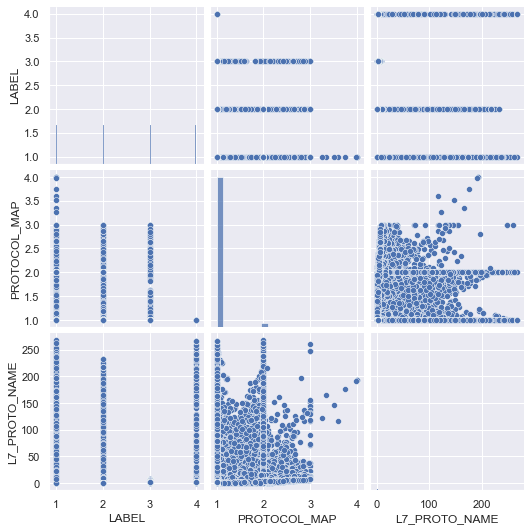

In [60]:
# Scatter plot:

sns.set()
cols = ['LABEL', 'PROTOCOL_MAP', 'L7_PROTO_NAME']
sns.pairplot(df_sample_1[cols], height = 2.5)
plt.show();

## Modelos

### Arbol de decision

In [36]:
# dtc = DecisionTreeClassifier()
# dtc = dtc.fit(feature_train, target_train)

In [37]:
train, validate, test = np.split(df_sample_1.sample(frac=1, random_state=42), [int(.55*len(df_sample_1)), int(.7*len(df_sample_1))])

In [38]:
target_train = train['LABEL']
feature_train = train.loc[:, train.columns != 'LABEL']


In [39]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(feature_train, target_train)

In [50]:
target_test = test['LABEL']
feature_test = test.loc[:, test.columns != 'LABEL']

In [67]:
target_pred_test = dtc.predict(feature_test)

In [68]:
classification_report_test = classification_report(target_test, target_pred_test, target_names=['Normal flow', 'SYN Scan - aggressive', 'Denial of Service R-U-Dead-Yet', 'Denial of Service Slowloris'])
print(classification_report_test)

                                precision    recall  f1-score   support

                   Normal flow       1.00      1.00      1.00    149937
         SYN Scan - aggressive       1.00      1.00      1.00    149842
Denial of Service R-U-Dead-Yet       1.00      1.00      1.00    150004
   Denial of Service Slowloris       1.00      1.00      1.00    150217

                      accuracy                           1.00    600000
                     macro avg       1.00      1.00      1.00    600000
                  weighted avg       1.00      1.00      1.00    600000



In [44]:
#--
target_validation = validate['LABEL']
feature_validation = validate.loc[:, validate.columns != 'LABEL']

In [70]:
target_prediction_validation = dtc.predict(feature_validation)

In [71]:
confusion_matrix(target_validation, target_prediction_validation)

array([[74927,   137,    76,    72],
       [  116, 74264,     7,     0],
       [   79,    13, 74964,     0],
       [   39,     0,     0, 75306]], dtype=int64)

In [72]:
#--
classification_report_validation = classification_report(target_validation, target_prediction_validation, target_names=['Normal flow', 'SYN Scan - aggressive', 'Denial of Service R-U-Dead-Yet', 'Denial of Service Slowloris'])
print(classification_report_validation)

                                precision    recall  f1-score   support

                   Normal flow       1.00      1.00      1.00     75212
         SYN Scan - aggressive       1.00      1.00      1.00     74387
Denial of Service R-U-Dead-Yet       1.00      1.00      1.00     75056
   Denial of Service Slowloris       1.00      1.00      1.00     75345

                      accuracy                           1.00    300000
                     macro avg       1.00      1.00      1.00    300000
                  weighted avg       1.00      1.00      1.00    300000



In [73]:
confusion_matrix(target_test, target_pred_test)

array([[149338,    277,    191,    131],
       [   277, 149547,     18,      0],
       [   148,     17, 149839,      0],
       [    66,      0,      0, 150151]], dtype=int64)

#### Gráfica de la curva ROC


In [74]:
#Gráfica de la curva ROC
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [75]:
p_df = dtc.predict_proba(feature_test)  
p_df = p_df[:, 1]

In [76]:
f_df, tp_df, thresholds = roc_curve(target_test, p_df, pos_label=4)

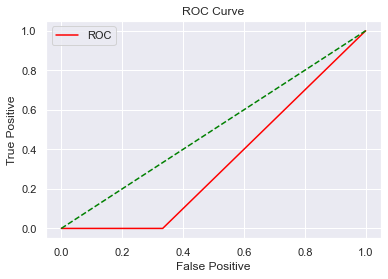

In [77]:
plt.plot(f_df, tp_df, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [78]:
cross_val_score(dtc, feature_test, target_test, cv=5)

array([0.99736667, 0.99724167, 0.99765   , 0.99743333, 0.99745833])

In [79]:
cross_val_score(dtc, feature_validation, target_validation, cv=5)

array([0.99661667, 0.9968    , 0.99706667, 0.99678333, 0.99683333])

### SVM

In [21]:
#Debido a que este modelo es bastante robusto, el tiempo de ejecucion con la cantidad de datos que manejamos es muy extenso
#por esto mismo se tuvo que fraccionar bastnate el dataset para las pruebas
df_sample_2 = df_sample_1.sample(frac=1/100100)

In [22]:
df_sample_2

,FIRST_SWITCHED,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,FLOW_START_MILLISECONDS,FLOW_START_SEC,IN_BYTES,IN_PKTS,L4_DST_PORT,...,TCP_WIN_MIN_OUT,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,TOTAL_FLOWS_EXP,LABEL
286278,1622443186,214,0,1622443187514,1622443186,1622443187514,1622443186,40,1,26055,...,0,0,0,0,0,0,0,0.0,26575054,1
1224925,1618232592,115332301,115331,1618232708970,1618232708,1618232593638,1618232592,1653,15,80,...,27960,1410,1410,7,8,0,0,2.0,82924038,3
1483497,1618231916,113063779,113063,1618232029593,1618232029,1618231916530,1618231916,1681,15,80,...,27960,1410,1410,7,8,0,0,2.0,82694540,3
1193219,1618232446,41607837,41607,1618232487929,1618232487,1618232446321,1618232446,897,9,80,...,20540,1034,1034,5,5,0,0,2.0,82867066,3
573993,1616667964,498,0,1616667965158,1616667964,1616667965158,1616667964,44,1,48864,...,0,1460,0,0,0,0,0,0.0,4066902,2
1743674,1618239555,60130111,60129,1618239616072,1618239615,1618239555941,1618239555,1070,11,80,...,27960,1410,1410,7,8,0,0,2.0,84018555,4
1904195,1618239739,60304144,60303,1618239799943,1618239799,1618239739638,1618239739,936,11,80,...,27960,1410,1410,7,8,0,0,2.0,84047418,4
1992579,1618247129,60364630,60364,1618247190650,1618247190,1618247130285,1618247129,1021,11,80,...,27960,1410,1410,7,8,0,0,2.0,85119207,4
779812,1616660239,686,0,1616660240133,1616660239,1616660240132,1616660239,44,1,55851,...,0,1460,0,0,0,0,0,0.0,2340250,2
1324662,1618226569,110008759,110008,1618226679711,1618226679,1618226569702,1618226569,1060,12,80,...,114,0,0,0,0,0,0,2.0,80855709,3


In [23]:
X = df_sample_2.drop('LABEL', axis=1)
y = df_sample_2['LABEL']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [25]:
from sklearn.svm import SVC

In [26]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [27]:
y_pred = svclassifier.predict(X_test)

In [28]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1 0 0]
 [0 0 1]
 [0 0 2]]
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.56      0.67      0.60         4
weighted avg       0.58      0.75      0.65         4



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# --

In [30]:
X = df_sample_2.drop('LABEL', axis=1)
y = df_sample_2['LABEL']

In [31]:
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [32]:
y_pred = svclassifier.predict(X_test)

In [33]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 1 0]
 [0 1 0]
 [0 2 0]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.25      1.00      0.40         1
           4       0.00      0.00      0.00         2

    accuracy                           0.25         4
   macro avg       0.08      0.33      0.13         4
weighted avg       0.06      0.25      0.10         4



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
# --

### Bayes

In [40]:
naiveBB = MultinomialNB()
naiveBB.fit(feature_train, target_train)

MultinomialNB()

In [41]:
predict_train = naiveBB.predict(feature_train)
print("Test Accuracy ", metrics.accuracy_score(predict_train, target_train))

Test Accuracy  0.84711


In [45]:
predict_vali = naiveBB.predict(feature_validation)
print("Validation accuracy", metrics.accuracy_score(predict_vali, target_validation))

Validation accuracy 0.8465866666666667


In [49]:
bayes_pre_test = naiveBB.predict(feature_test)
print("Test Accuracy", metrics.accuracy_score(bayes_pre_test, target_test))

Test Accuracy 0.8462283333333334


In [51]:
#Matriz de confusion
print(classification_report(target_test, bayes_pre_test))

              precision    recall  f1-score   support

           1       0.73      0.72      0.73    149937
           2       0.80      1.00      0.89    149842
           3       0.99      0.70      0.82    150004
           4       0.91      0.97      0.94    150217

    accuracy                           0.85    600000
   macro avg       0.86      0.85      0.84    600000
weighted avg       0.86      0.85      0.84    600000



In [52]:
from sklearn.datasets import make_classification

In [53]:
#nb_samples = 300

In [54]:
#X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0)

In [55]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [56]:
p_df = naiveBB.predict_proba(feature_test)  
p_df = p_df[:, 1]

In [57]:
f_df, tp_df, thresholds = roc_curve(target_test, p_df, pos_label=4)

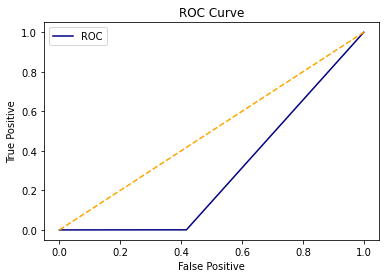

In [58]:
plt.plot(f_df, tp_df, color='navy', label='ROC')
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Conclusiones

---

1. El modelo de SVM considermos que es el menos efectivo ya que por la cantidad de datos este fue el que mas tiempo tardó para realizar procedimientos
2. Como podemsos darnos cuenta en las matrices de confusion, el modelo que tuvo la mayor exactitud para predecir lo solicitado fue el del arbol de decision. Podemos darnos cuenta que llega a darnos porcentaje bastante alto en comparacion a los otros dos.
3. Debido a las necesidades que se tuvieron durante el preprocesamiento, fue necesario descartar todas las columnas que tuvieran tipo de datos fuera de los paramtros establecidos
4. Para poder realizar comparaciones dentro de nuestro procedimientos, fue necesario realizar cambios a las columnas cualitativas, para que estas pudieran utilizarse cuantitativamente. Asi com podemos ver con la columna "L7_PROTO_NAME".